In [72]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Load the data from the excel file
df = pd.read_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name='Injuries_22-23')
#df_2 = pd.read_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name='Advanced Stats')
df_3 = pd.read_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name='Totals_22-23')

In [7]:
# Merge the two dataframes on the "Player" column
df_3 = pd.merge(df, df_2, on="Player")

# You can now use the df_3 dataframe
print(df_3.head())

# Save the merged dataframe to an Excel file
df_3.to_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name="Combined", index=False, mode='a')

               Player Position Team                           Injury  Games  \
0     Khris Middleton       SF  MIL                       Knee/Wrist     39   
1  Karl-Anthony Towns        C  MIN                             Calf     37   
2      Brandon Ingram       SF  NOP                   Toe/Concussion     35   
3       Stephen Curry       PG  GSW     Leg/Hip/Shoulder/Ankle/Elbow     17   
4       Kawhi Leonard       SF  LAC  Injury Management/Illness/Ankle     25   

   Cash Earned While Injured Pos  Age   Tm   G  ...  Unnamed: 18  OWS  DWS  \
0                   17883708  SF   31  MIL  16  ...          NaN  0.2  0.5   
1                   14388930  PF   27  MIN  21  ...          NaN  1.3  0.8   
2                   13096800  SF   25  NOP  21  ...          NaN  0.4  0.7   
3                   11326824  PG   34  GSW  38  ...          NaN  4.2  1.3   
4                   10745240  SF   31  LAC  32  ...          NaN  2.8  1.4   

    WS  WS/48  Unnamed: 23  OBPM  DBPM  BPM  VORP  
0  0

In [74]:
# Merge the dataframes based on the "Player" column
df_4 = pd.merge(df, df_3, on="Player", how="outer")

# Write the combined data back to the same Excel file as a new sheet "Sheet 3"
with pd.ExcelWriter("/Users/nadeempatel/Desktop/player-injuries.xlsx", engine="openpyxl", mode="a") as writer:
    df_4.to_excel(writer, sheet_name="Combined_Totals", index=False)

In [87]:
import pandas as pd

def categorize_injury(injury_string):
    mid_area = ["Adductor", "Groin", "Hip"]
    foot = ["Toe", "Foot", "Heel", "Achilles", "Ankle"]
    leg = ["Knee", "Calf", "Hamstring", "Shin", "Thigh", "Quad", "Glute", "Leg"]
    head = ["Concussion", "Neck", "Nose", "Face", "Eye", "Mouth"]
    hand = ["Wrist", "Thumb", "Hand", "Finger"]
    arm = ["Shoulder", "Elbow"]
    torso = ["Ribs", "Back", "Tailbone"]
    illness = ["Illness"]
    management = ["Injury Management"]
    
    injury_list = injury_string.split("/")
    adjusted_list = []
    
    for injury in injury_list:
        if injury in mid_area:
            adjusted_list.append("Mid Area")
        elif injury in foot:
            adjusted_list.append("Foot")
        elif injury in leg:
            adjusted_list.append("Leg")
        elif injury in head:
            adjusted_list.append("Head")
        elif injury in hand:
            adjusted_list.append("Hand")
        elif injury in arm:
            adjusted_list.append("Arm")
        elif injury in torso:
            adjusted_list.append("Torso")
        elif injury in illness:
            adjusted_list.append("Illness")
        elif injury in management:
            adjusted_list.append("Injury Management")
        else:
            adjusted_list.append("Other")
    
    return "/".join(adjusted_list)

df = pd.read_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name="Combined")
df["InjuryAdjusted"] = df["Injury"].apply(categorize_injury)
df.to_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name="Combined", index=False)



In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the data into a pandas dataframe
df = pd.read_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name="Combined")

# Convert the "Injury" column to numeric
df["Injury"] = pd.to_numeric(df["Injury"], errors='coerce')

# Fill NaN values with 0
df["Injury"] = df["Injury"].fillna(0)

# Create a binary variable for injury status
df["Injury"] = np.where(df["Injury"] > 0, 1, 0)

# Select the columns of interest
df = df[["Player", "Pos", "Age", "G", "PER", "USG%", "BPM", "Injury", "Games"]]

# Create a binary variable for injury status
df["Injury"] = np.where(df["Injury"] > 0, 1, 0)

# Split the data into training and testing sets
training_data = df.sample(frac=0.8, random_state=0)
testing_data = df.drop(training_data.index)

# Train a logistic regression model
X_train = training_data[["Pos", "Age", "G", "PER", "USG%", "BPM"]]
y_train = training_data["Injury"]

model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing data
X_test = testing_data[["Pos", "Age", "G", "PER", "USG%", "BPM"]]
y_test = testing_data["Injury"]

y_pred = model.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Perform a regression analysis to determine the relationship between performance metrics and number of games missed
import statsmodels.api as sm

# Add a constant term to the input data
X = sm.add_constant(training_data[["Pos", "Age", "G", "PER", "USG%", "BPM"]])

# Fit the regression model
model = sm.OLS(training_data["Games"], X).fit()

# Print the summary of the model
print(model.summary())


ValueError: could not convert string to float: 'PG'

/var/folders/y5/dq1mfwr90dzb31hxt6v9yjtm0000gn/T/ipykernel_19246/3710314203.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


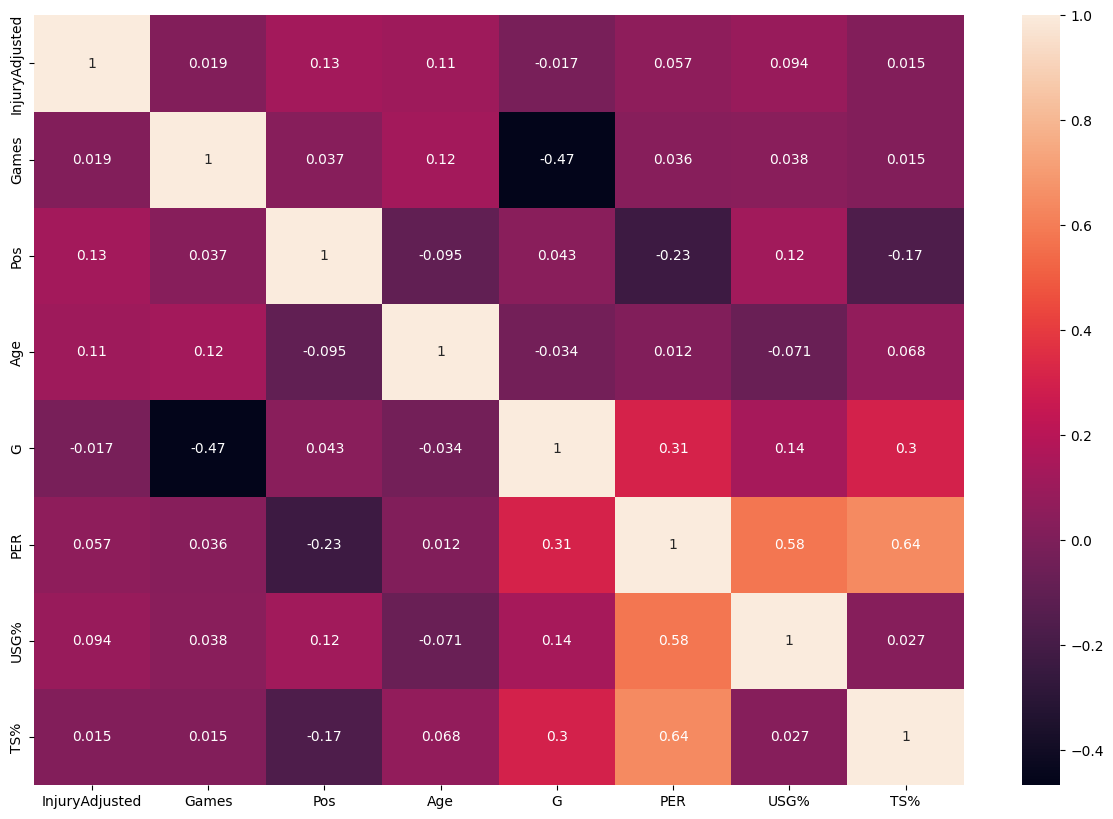

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name="Combined")

# Select relevant columns
df = df[["Player", "InjuryAdjusted", "Games", "Pos", "Age", "G", "PER", "USG%", "TS%"]]

# Drop missing values
df = df.dropna()

# Convert injury column to numerical
df["InjuryAdjusted"] = df["InjuryAdjusted"].astype("category")
df["InjuryAdjusted"] = df["InjuryAdjusted"].cat.codes

# Convert injury column to numerical
df["Pos"] = df["Pos"].astype("category")
df["Pos"] = df["Pos"].cat.codes

# Plot a heatmap to show the correlation between variables
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name="Combined")

# Drop rows with missing values
#df = df.dropna()

# Filter relevant columns
df = df[["Player", "Pos", "Age", "G", "MP", "Injury", "Games"]]

# Group the data by Injury and calculate the average Age, G and MIN for each Injury type
grouped = df.groupby("Injury").agg({"Pos": "mean"})

# Plot the results
grouped.plot(kind="barh", subplots=True, figsize=(15, 50), sharey=False, layout=(2,2))

# Rotate x-axis labels by 45 degrees and reduce font size
plt.yticks(rotation=45, fontsize=0.5)
plt.xlabel("Age")
plt.tight_layout()
plt.show()

TypeError: Could not convert PG to numeric

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name="Combined")

def categorize_injury(row):
    injury = row["Injury"]
    mid_area = ["Adductor", "Groin", "Hip"]
    foot = ["Toe", "Foot", "Heel", "Achilles", "Ankle"]
    leg = ["Knee", "Calf", "Hamstring", "Shin", "Thigh", "Quad", "Glute", "Leg"]
    head = ["Concussion", "Neck", "Nose", "Face", "Eye", "Mouth"]
    hand = ["Wrist", "Thumb", "Hand", "Finger"]
    arm = ["Shoulder", "Elbow"]
    torso = ["Ribs", "Back", "Tailbone"]
    illness = ["Illness"]
    management = ["Injury Management"]
    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in torso) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Mid-area/Foot/Leg/Head/Hand/Arm/Torso/Illness/Management"
    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in torso) and any(word in injury for word in illness):
        return "Mid-area/Foot/Leg/Head/Hand/Arm/Torso/Illness"
    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in torso) and any(word in injury for word in management):
        return "Mid-area/Foot/Leg/Head/Hand/Arm/Torso/Management"
    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Mid-area/Foot/Leg/Head/Hand/Arm/Illness/Management"
    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in torso) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Mid-area/Foot/Leg/Head/Hand/Torso/Illness/Management"
    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in arm) and any(word in injury for word in torso) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Mid-area/Foot/Leg/Head/Arm/Torso/Illness/Management"
    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in torso) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Mid-area/Foot/Leg/Hand/Arm/Torso/Illness/Management"
    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in torso) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Mid-area/Foot/Leg/Hand/Arm/Torso/Illness/Management"
    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in torso) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Mid-area/Foot/Head/Hand/Arm/Torso/Illness/Management"
    
    if any(word in injury for word in mid_area) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in torso) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Mid-area/Leg/Head/Hand/Arm/Torso/Illness/Management"
    
    if any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in torso) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Foot/Leg/Head/Hand/Arm/Torso/Illness/Management"
    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in torso):
        return "Mid-area/Foot/Leg/Head/Hand/Arm/Torso"
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in management):
        return "Mid-area/Foot/Leg/Head/Hand/Arm/Management"
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Mid-area/Foot/Leg/Head/Hand/Illness/Management"
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in torso) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Mid-area/Foot/Leg/Head/Torso/Illness/Management"
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head) and any(word in injury for word in hand) and any(word in injury for word in arm) and any(word in injury for word in torso) and any(word in injury for word in illness) and any(word in injury for word in management):
        return "Mid-area/Foot/Leg/Head/Hand/Arm/Torso/Illness/Management"
    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head):
        return "Mid-area/Foot/Leg/Head"
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in leg)
        return "Mid-area/Foot/Leg"
    if any(word in injury for word in mid_area) and any(word in injury for word in foot) and any(word in injury for word in head):
        return "Mid-area/Foot/Head"
    if any(word in injury for word in mid_area) and any(word in injury for word in leg) and any(word in injury for word in head):
        return "Mid-area/Leg/Head"
    if any(word in injury for word in foot) and any(word in injury for word in leg) and any(word in injury for word in head):
        return "Foot/Leg/Head"    
    if any(word in injury for word in mid_area) and any(word in injury for word in foot):
        return "Mid-area/Foot"
    if any(word in injury for word in mid_area)and any(word in injury for word in leg):
        return "Mid-area/Leg"
    if any(word in injury for word in mid_area) and any(word in injury for word in head):
        return "Mid-area/Head"
    if any(word in injury for word in foot) and any(word in injury for word in leg):
        return "Foot/Leg"
    if any(word in injury for word in foot) and any(word in injury for word in head):
        return "Foot/Head"
    if any(word in injury for word in leg) and any(word in injury for word in head):
        return "Leg/Head"
    if any(word in injury for word in foot) and any(word in injury for word in leg):
        return "Foot/Leg"
    elif any(word in injury for word in mid_area):
        return "Mid-area"
    elif any(word in injury for word in foot):
        return "Foot"
    elif any(word in injury for word in leg):
        return "Leg"
    if any(word in injury for word in head):
        return "Head"
    else:
        return ""

#df = pd.read_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name="Combined")
df["Injury_Category"] = df.apply(categorize_injury, axis=1)
# Save the data to a new excel file
df.to_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name="Combined", index=False)

SyntaxError: '[' was never closed (1184688858.py, line 15)

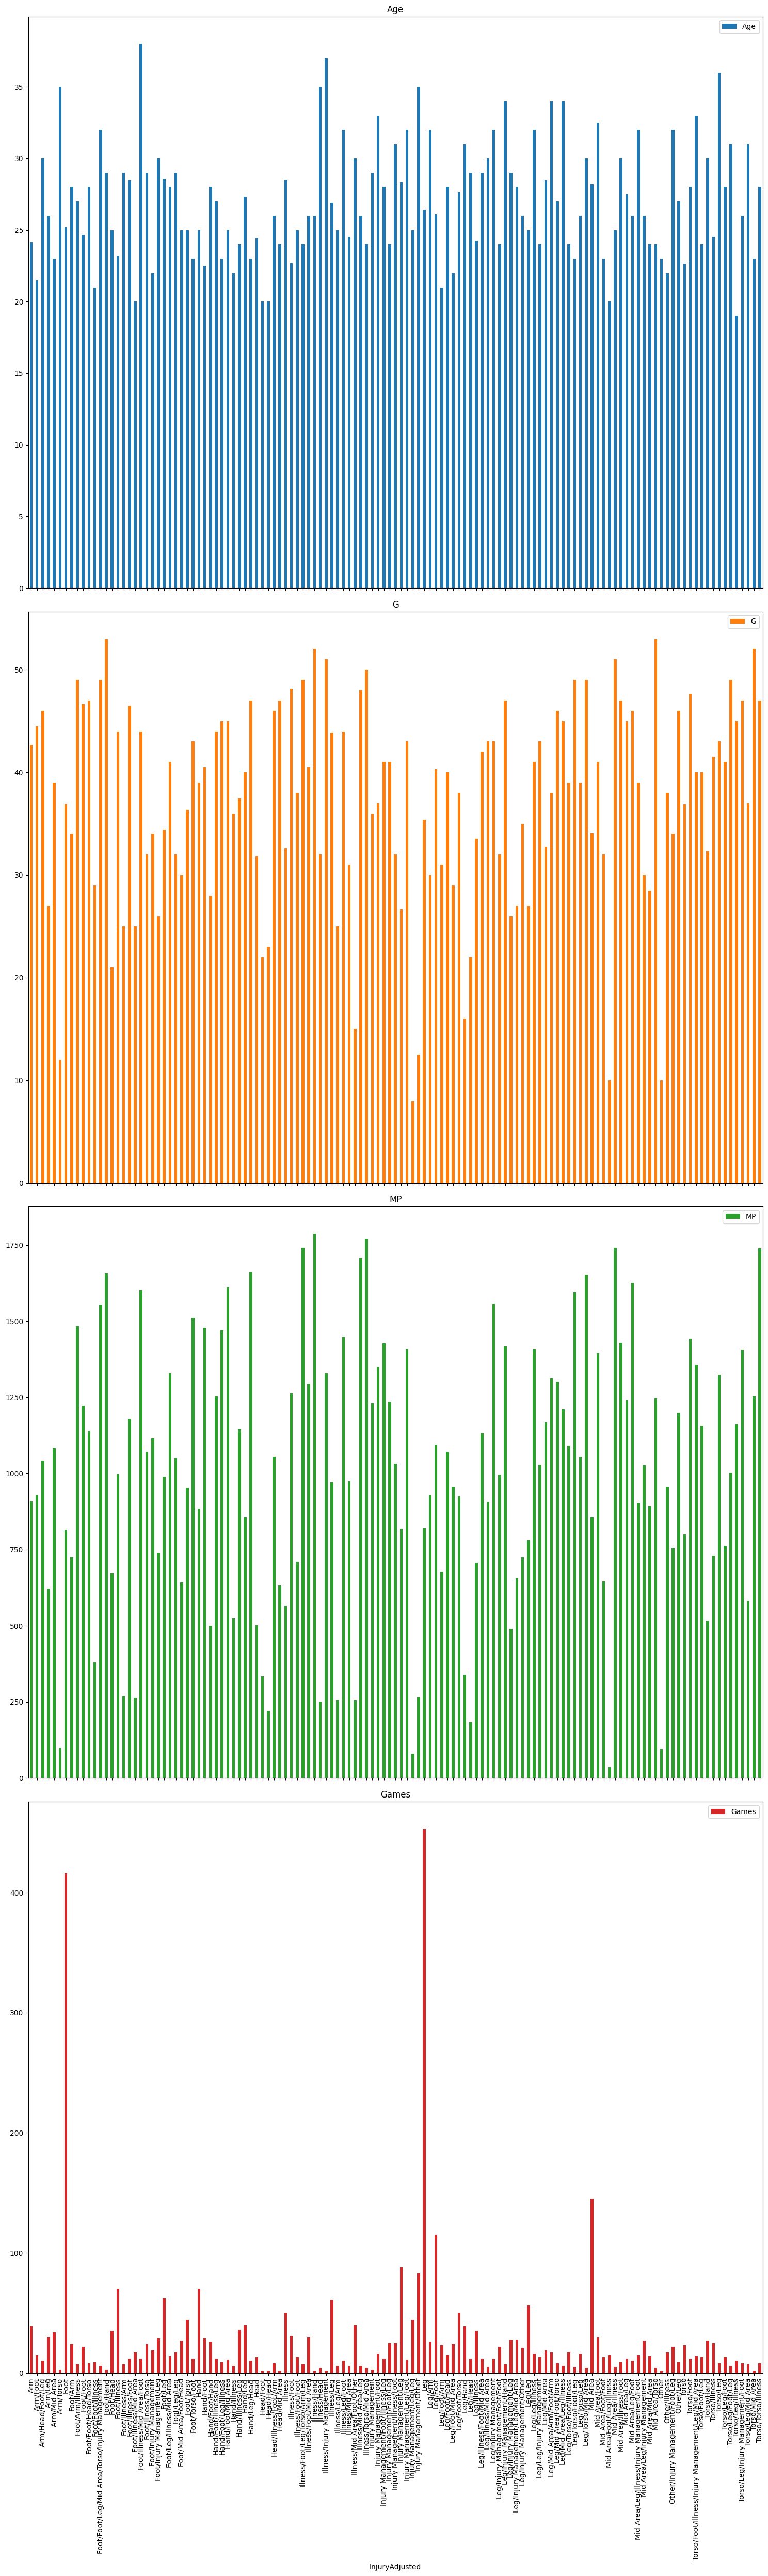

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("/Users/nadeempatel/Desktop/player-injuries.xlsx", sheet_name="Combined")

# Drop rows with missing values
#df = df.dropna()

# Filter relevant columns
df = df[["Player", "Pos", "Age", "G", "MP", "InjuryAdjusted", "Games"]]

# Group the data by Injury and calculate the average Age, G and MIN for each Injury type
grouped = df.groupby("InjuryAdjusted").agg({"Age": "mean", "G": "mean", "MP": "mean", "Games": "sum"})

# Plot the results
grouped.plot(kind="bar", subplots=True, figsize=(15, 50), sharey=False)
plt.tight_layout()
plt.show()